In [1]:
from libraries import*

Welcome to JupyROOT 6.26/06
iminuit version: 2.17.0


**Define Lorentz func**

In [2]:

def lorentz(x, gamma, x0, A): #define lorentz fnc for single peak
    return (A*gamma/(np.pi*((x - x0)**2) + gamma**2))

def lorentz_multi(x, gamma, center, split, A): #define fnc for three peaks
    return lorentz(x, gamma, center - split, A) + lorentz(x, gamma, center, A) + lorentz(x, gamma, center + split, A)

def lorentz_cluster(x, gamma, center_1, split_1, center_2, split_2, A): #define fnc for cluster of six peaks 
    return lorentz_multi(x, gamma, center_1, split_1, A) + lorentz_multi(x, gamma, center_2, split_2, A)


**Plot variables**

In [3]:
steps = 32768
x_start = 100.06
x_end = -106.0
steps_ppm = (x_end - x_start)/steps
x = np.arange(x_start, x_end, steps_ppm)
# print(x)
# print(lorentz(x_end, Peak_width, cluster_2_center))

**Information of nuclei**

In [4]:
m = 3/2 #spin of nuclei
clusters = 2 # magnetically different nuclei in unit cell
peaks = int(2*m)


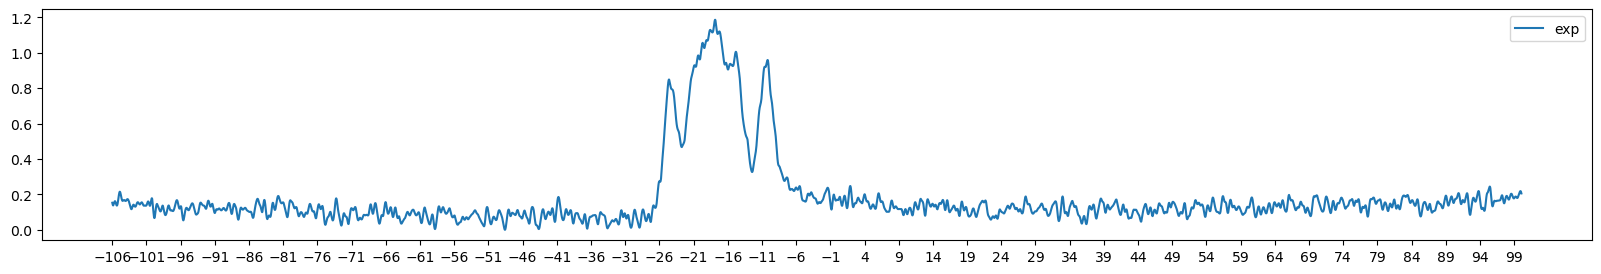

In [15]:
# [cluster_1_center,cluster_2_center]  = [-15, -23] # Varying centers for Cluster 1 and 2
# # print(cluster_1_centers)
# # cluster_2_centers = -np.linspace(0, 5, 15) # Varying centers for Cluster 2
# print(cluster_1_center, '\n', cluster_2_center)

# Cluster_1_sep = 1.2 #separation of peaks in cluster 1
# Cluster_2_sep = 0.8 #separation of peaks in cluster 2

# peak_sep = np.mean([Cluster_1_sep, Cluster_2_sep]) #separation of peak

# peak_width = 0.5
# peak_height = 0.3
# parameter = [(cluster_1_center, peak_sep),(cluster_2_center, peak_sep)]
# peak_arrays = [[] for _ in range(len(parameter))]

# for id, (a,i) in enumerate(parameter):
#     peak_array = []
#     for j in range(-peaks+2, peaks-1):
#         key = f"result{id + 1}_{j}"
#         result = a + j * i
#         peak_array.append(result)
#     peak_arrays[id] = peak_array

# y_sum = np.zeros_like(x)

plt.figure(figsize=(20,3))
# for id, (peak_array, color) in enumerate(zip(peak_arrays, ["orange", "green"])):
#     for peak_center in peak_array:
#         y = lorentz(x, gamma = peak_width, x0 = peak_center, A = peak_height)
#         y_sum+= y
#         plt.plot(x, y, label=f"Cluster {id + 1}", color=color)
        
#         # print(f"Cluster {id + 1}, Peak Center: {peak_center}")

# plt.plot(x, y_sum, color = 'black', label="Sum of Clusters")

yData = np.loadtxt('/home/shiva/WMU/PhD/Data/text/SW_Shiva111.txt', unpack=True ) # read in  
yData = yData / max(yData)  # normalize
yData = yData - min(yData)  # remove any vertical offset
# Plot the experimental data
plt.plot(x, yData, '-', label="exp")
plt.xticks(np.arange(min(x), max(x)+1,5.0)) 
# plt.xlim([50,-80])  
plt.legend()

gamma = 2.4388646087024557
center_1 = -20.659471073059102
split_1 = 3.7446064799535224
center_2 = -14.435899565262924
split_2 = 4.268696011139263
A = 1.521128046610299


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.517e+04 (chi2/ndof = 1.4)│              Nfcn = 339              │
│ EDM = 5.17e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ gamma    │   2.439   │   0.024   │            │            │         │         │       │
│ 1 │ center_1 │  -20.659  │   0.012   │            │            │         │         │       │
│ 2 │ split_1  │   3.745   │   0.012   │            │            │         │         │       │
│ 3 │ center_2 │  -14.436  │   0.012   │            │            │         │         │       │
│ 4 │ split_2  │   4.269   │   0.011   │            │            │         │         │       │
│ 5 │ A        │   1.521   │   0.004   │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────────────────────────────┐
│          │     gamma  center_1   split_1  center_2   split_2         A │
├──────────┼─────────────────────────────────────────────────────────────┤
│    gamma │  0.000588  5.22e-05  4.12e-06  6.52e-05  2.61e-05  6.52e-05 │
│ center_1 │  5.22e-05  0.000152  3.27e-05  5.07e-05 -2.29e-05  2.49e-06 │
│  split_1 │  4.12e-06  3.27e-05  0.000135  2.55e-05 -5.37e-06   5.4e-06 │
│ center_2 │  6.52e-05  5.07e-05  2.55e-05  0.000131 -2.47e-05  1.06e-05 │
│  split_2 │  2.61e-05 -2.29e-05 -5.37e-06 -2.47e-05  0.000128  5.81e-06 │
│        A │  6.52e-05  2.49e-06   5.4e-06  1.06e-05  5.81e-06     2e-05 │
└──────────┴─────────────────────────────────────────────────────────────┘

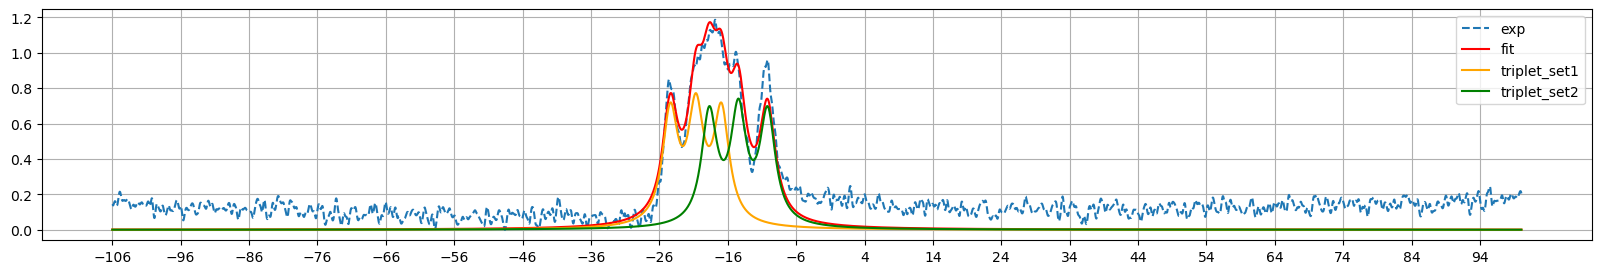

In [22]:
least_squares = LeastSquares(x, yData, 0.1, lorentz_cluster)
m = Minuit(least_squares, gamma = 1, center_1 = -15, split_1 = 2, center_2 = -15, split_2 = 2, A = 1).migrad()
# m = Minuit(least_squares, gamma = m.values['gamma'], center_1 = m.values['center_1'], split_1 = m.values['split_1'], center_2 = m.values['center_2'], split_2 = m.values['split_2'], A = m.values['A']).migrad()
# corr_mat = (m.covariance.correlation())
# print(corr_mat)
# print(m.migrad())
if m.values['split_1']>5 or m.values['split_2']> 5:
    print("\033[91mCheck!!!\033[0m")

triplet_1 = lorentz_multi(x, m.values['gamma'], m.values['center_1'], m.values['split_1'], m.values['A'])
triplet_2 = lorentz_multi(x, m.values['gamma'], m.values['center_2'], m.values['split_2'], m.values['A'])
plt.figure(figsize=(20,3))
xinterval = np.arange(-50,10,10) 
plt.plot(x, yData, '--', label="exp")
plt.plot(x, lorentz_cluster(x, *m.values), label="fit", color = 'red')  
plt.plot(x,triplet_1, label = "triplet_set1",color = "orange") 
plt.plot(x,triplet_2, label = "triplet_set2",color = "green")

plt.xticks(np.arange(min(x), max(x)+1, 10.0)) 
# plt.xlim([50,-80]) 
plt.grid()
plt.legend()

for key, value in zip(m.parameters, m.values):
    print(f"{key} = {value}")
m.migrad()


In [7]:
cluster_1_center = m.values['center_1']
cluster_2_center = m.values['center_2']
Cluster_1_sep = m.values['split_1'] #separation of peaks in cluster 1
Cluster_2_sep = m.values['split_2'] #separation of peaks in cluster 2

peak_sep = np.mean([Cluster_1_sep, Cluster_2_sep]) #separation of peak

peak_width = m.values['gamma']
peak_height = m.values['A']
parameter = [(cluster_1_center, peak_sep),(cluster_2_center, peak_sep)]
peak_arrays = [[] for _ in range(len(parameter))]

for id, (a,i) in enumerate(parameter):
    peak_array = []
    for j in range(-peaks+2, peaks-1):
        key = f"result{id + 1}_{j}"
        result = a + j * i
        peak_array.append(result)
    peak_arrays[id] = peak_array
    print(f"Cluster {id + 1}", peak_array)


    

Cluster 1 [-26.858616495345665, -24.027361343394997, -21.19610619144433]
Cluster 2 [-28.004856029076773, -25.173600877126106, -22.342345725175438]


[-15.         -14.64285714 -14.28571429 -13.92857143 -13.57142857
 -13.21428571 -12.85714286 -12.5        -12.14285714 -11.78571429
 -11.42857143 -11.07142857 -10.71428571 -10.35714286 -10.        ] 
 [-10.         -10.35714286 -10.71428571 -11.07142857 -11.42857143
 -11.78571429 -12.14285714 -12.5        -12.85714286 -13.21428571
 -13.57142857 -13.92857143 -14.28571429 -14.64285714 -15.        ]


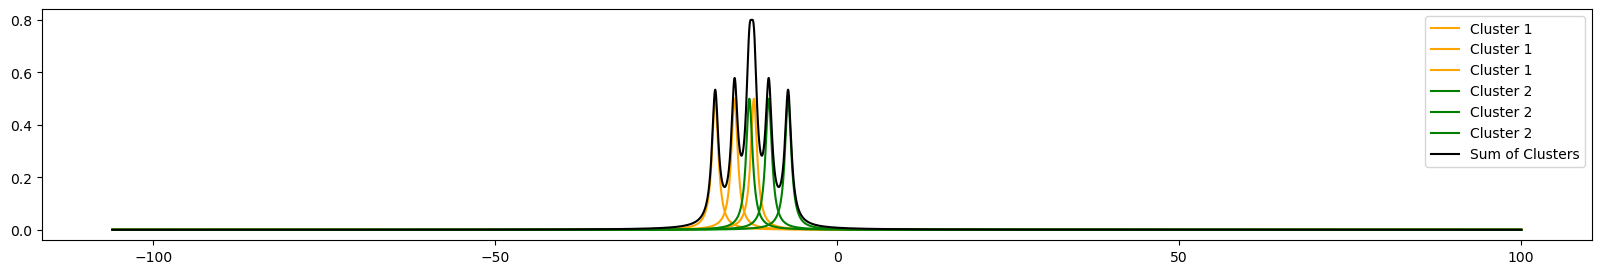

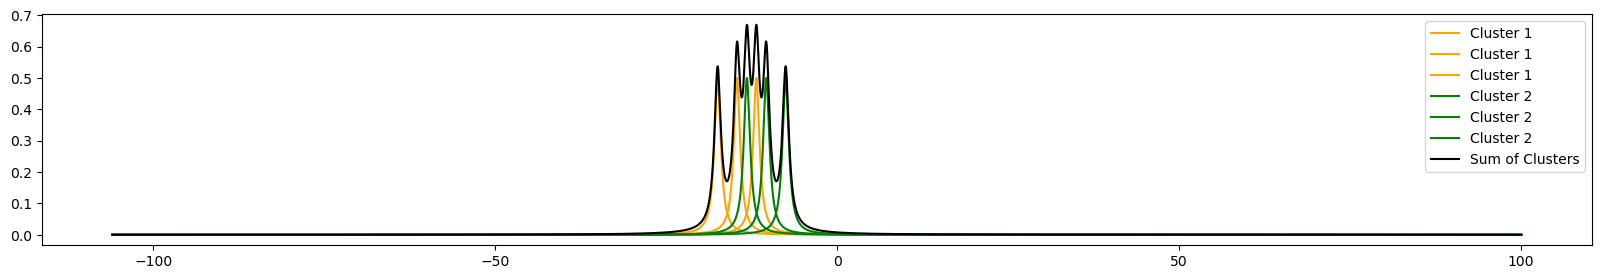

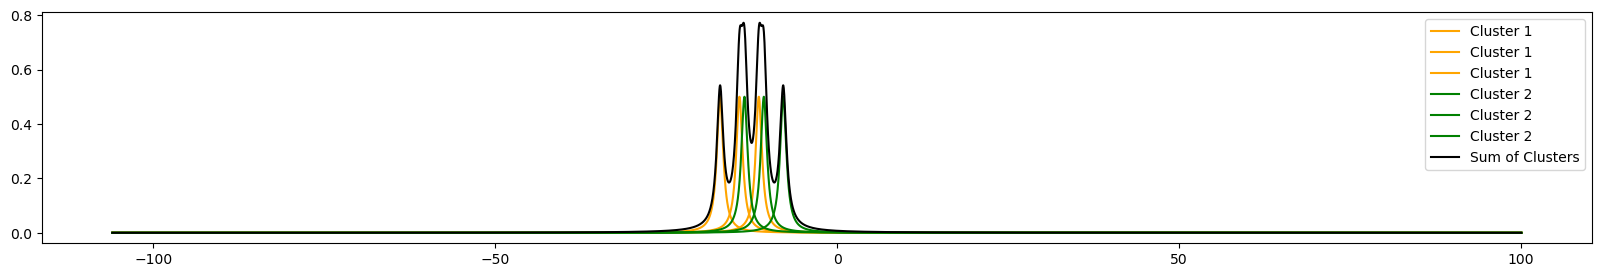

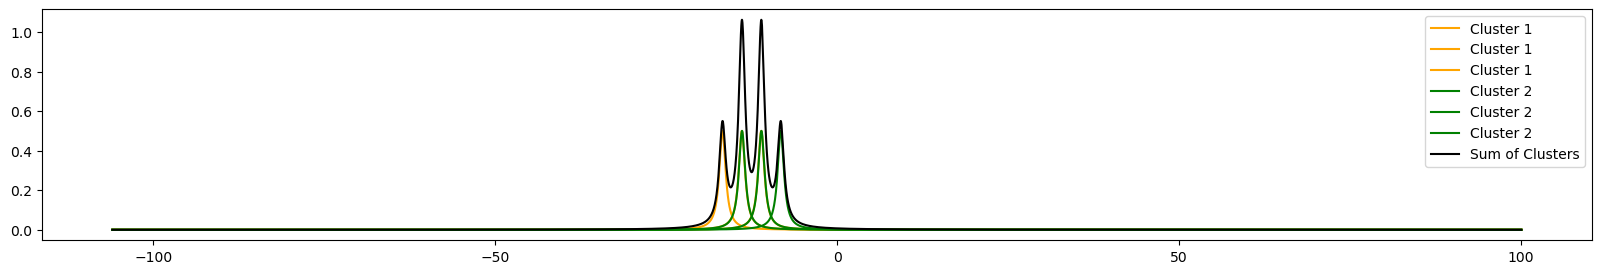

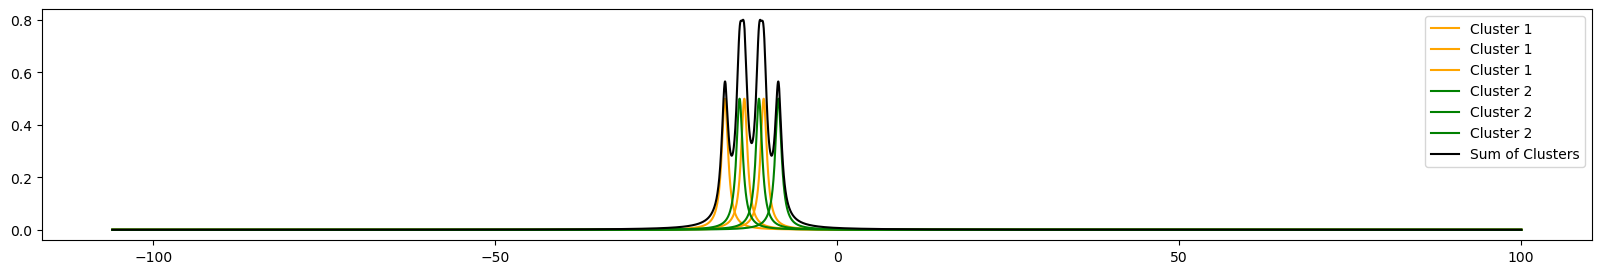

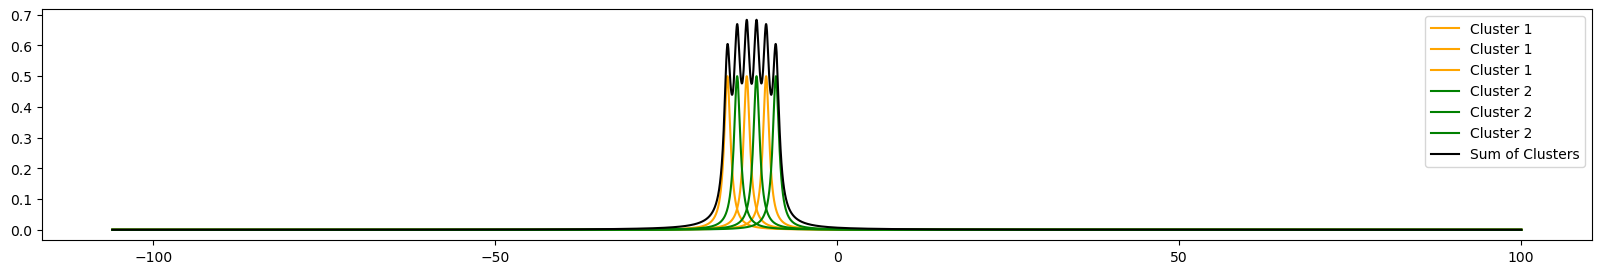

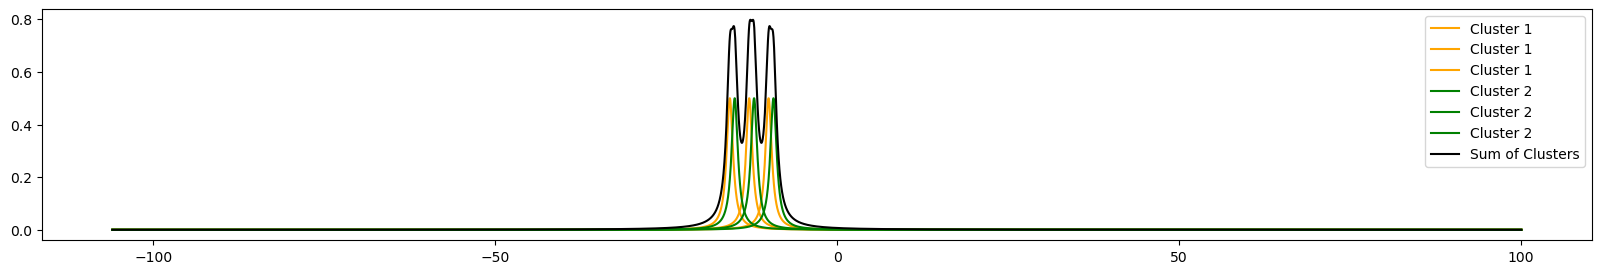

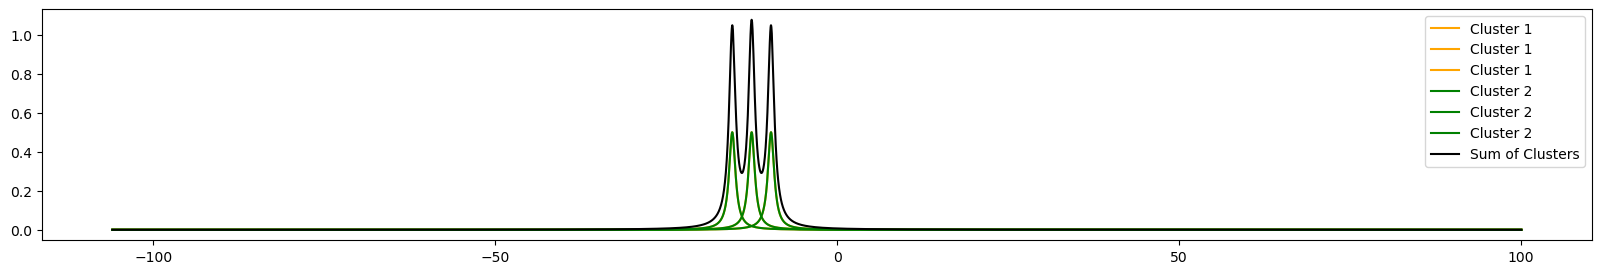

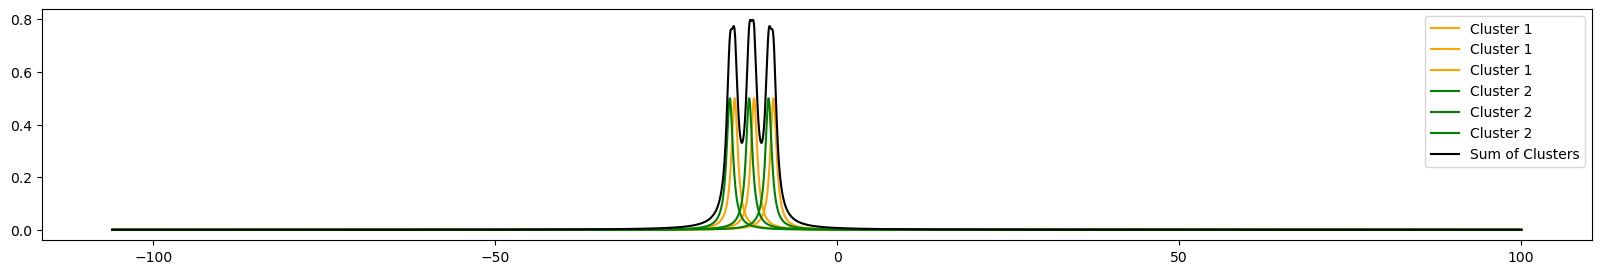

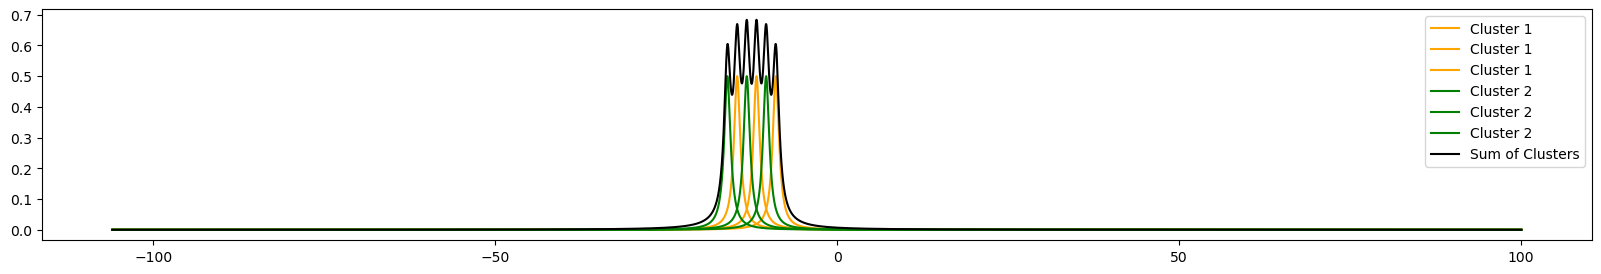

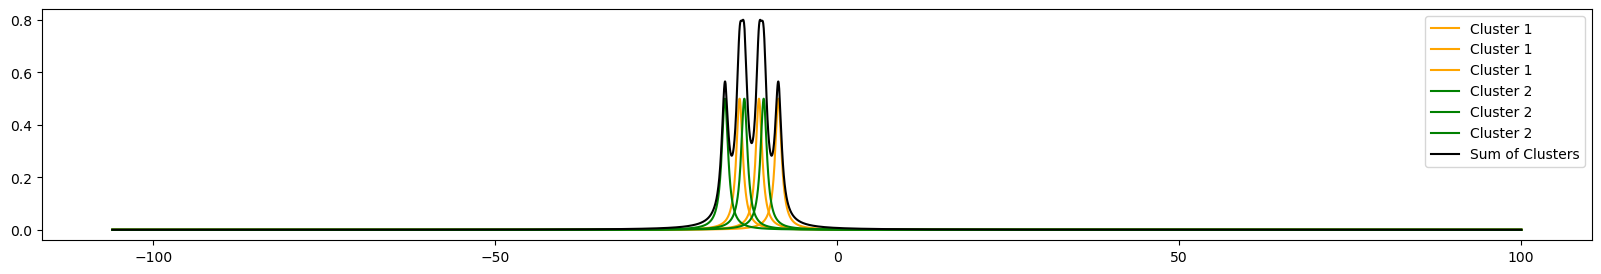

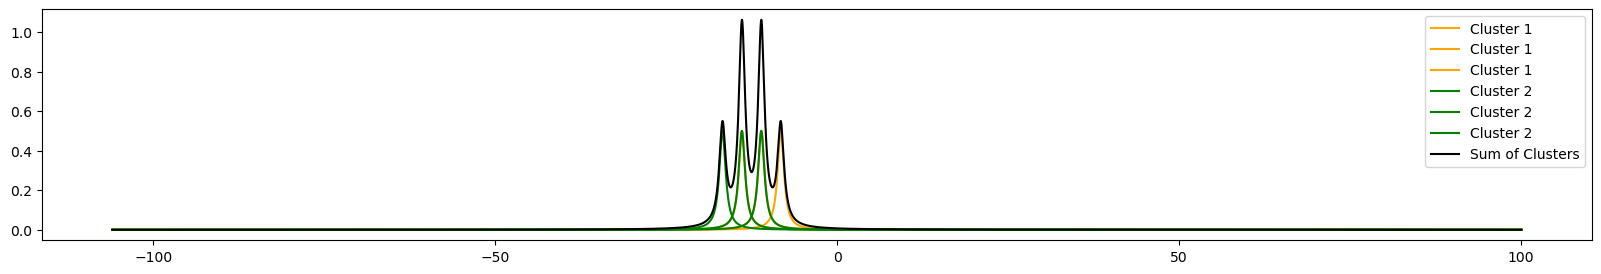

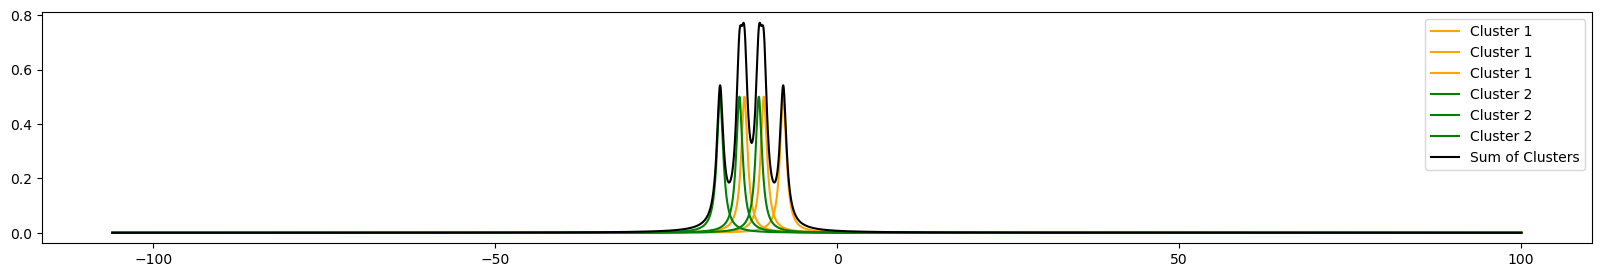

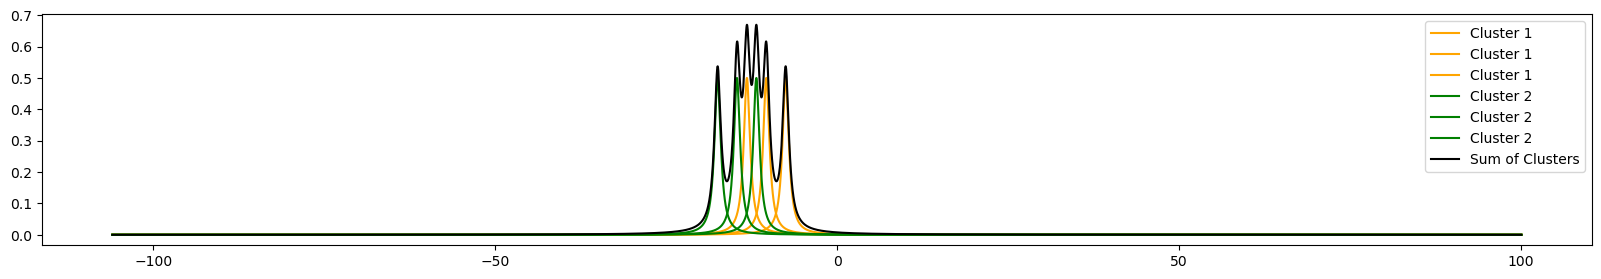

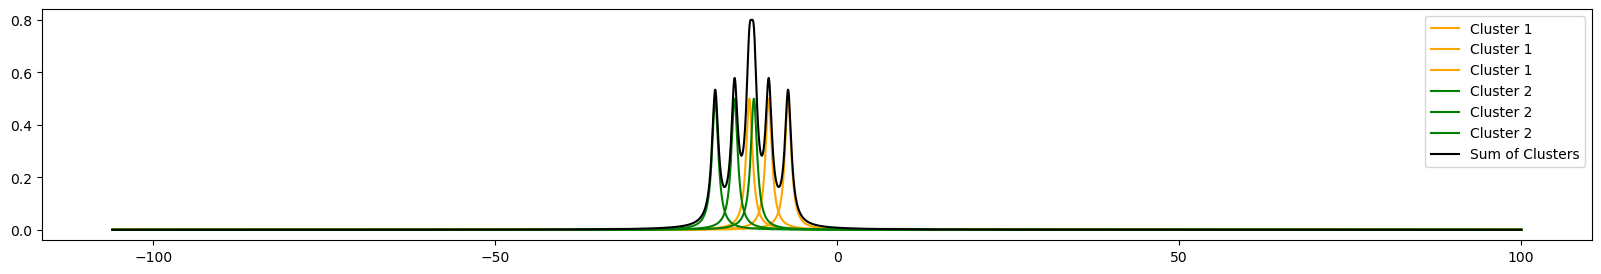

In [8]:

[cluster_1_centers,cluster_2_centers]  = [np.linspace(-15, -10, 15), np.linspace(-10, -15, 15)] # Varying centers for Cluster 1 and 2
# print(cluster_1_centers)
# cluster_2_centers = -np.linspace(0, 5, 15) # Varying centers for Cluster 2
print(cluster_1_centers, '\n', cluster_2_centers)

Cluster_1_sep = 2.852759257 #separation of peaks in cluster 1
Cluster_2_sep = 2.814838969 #separation of peaks in cluster 2

peak_sep = np.mean([Cluster_1_sep, Cluster_2_sep]) #separation of peak

peak_width = 1
peak_height = 0.5
for (cluster_1_center, cluster_2_center) in zip(cluster_1_centers, cluster_2_centers):
    parameter = [(cluster_1_center, peak_sep),(cluster_2_center, peak_sep)]
    peak_arrays = [[] for _ in range(len(parameter))]

    for id, (a,i) in enumerate(parameter):
        peak_array = []
        for j in range(-peaks+2, peaks-1):
            key = f"result{id + 1}_{j}"
            result = a + j * i
            peak_array.append(result)
        peak_arrays[id] = peak_array

    y_sum = np.zeros_like(x)
    plt.figure(figsize=(20,3))
    for id, (peak_array, color) in enumerate(zip(peak_arrays, ["orange", "green"])):
        for peak_center in peak_array:
            y = lorentz(x, gamma = peak_width, x0 = peak_center, A = peak_height)
            y_sum+= y
            plt.plot(x, y, label=f"Cluster {id + 1}", color=color)
            
            # print(f"Cluster {id + 1}, Peak Center: {peak_center}")

    plt.plot(x, y_sum, color = 'black', label="Sum of Clusters")

    plt.legend()

In [9]:
for id, peak_array in enumerate(peak_arrays):
    print(peak_array)
print(peak_arrays)

[-12.833799113000001, -10.0, -7.166200887]
[-17.833799113, -15.0, -12.166200886999999]
[[-12.833799113000001, -10.0, -7.166200887], [-17.833799113, -15.0, -12.166200886999999]]
